### Imports
Imports Go Here

In [138]:
import numpy as np

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range

from astroplan.plots import plot_sky, plot_airmass
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import observability_table

In [139]:
apo = Observer.at_site('apo')
apo

<Observer: name='apo',
    location (lon, lat, el)=(-105.82000000000002 deg, 32.78000000000001 deg, 2797.9999999996007 m),
    timezone=<UTC>>

In [140]:
apo.timezone = pytz.timezone('US/Pacific')
apo

<Observer: name='apo',
    location (lon, lat, el)=(-105.82000000000002 deg, 32.78000000000001 deg, 2797.9999999996007 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>

In [141]:
m31 = FixedTarget.from_name("m31")
m31

<FixedTarget "m31" at SkyCoord (ICRS): (ra, dec) in deg (10.684793, 41.269065)>

In [142]:
spiro = FixedTarget.from_name("IC 418")
spiro

<FixedTarget "IC 418" at SkyCoord (ICRS): (ra, dec) in deg (81.86746, -12.697282)>

### Best Season
The Best Season will be in Fall because the sun will need to be at about the 180 degrees from the Objects RA. 

In [143]:
window_start = Time("2018-03-31 12:00:00")
window_end = Time("2018-04-01 12:00:00")
reference_time = Time("2018-03-31 23:59:59")
reference_time

<Time object: scale='utc' format='iso' value=2018-03-31 23:59:59.000>

In [144]:
astro_set = apo.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise = apo.twilight_morning_astronomical(reference_time, which='next')

In [145]:
observing_length = (astro_rise - astro_set).to(u.h)
observing_length

<Quantity 8.68747487 h>

/Users/jamespierce/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


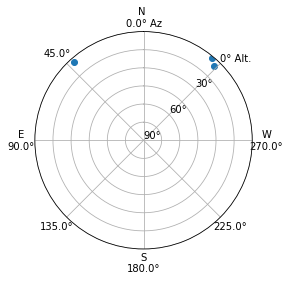

In [146]:
start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

plot_sky(m31, apo, time_grid);

In [147]:
dec_window_start = Time("2018-12-31 12:00:00")
dec_window_end = Time("2019-01-01 12:00:00")
dec_reference_time = Time("2018-12-31 23:59:59")
dec_reference_time

<Time object: scale='utc' format='iso' value=2018-12-31 23:59:59.000>

In [148]:
dec_astro_set = apo.twilight_evening_astronomical(dec_reference_time, which='nearest')
dec_astro_rise = apo.twilight_morning_astronomical(dec_reference_time, which='next')
dec_astro_set

<Time object: scale='utc' format='jd' value=2458484.566220291>

In [149]:
dec_observing_length = (dec_astro_rise - dec_astro_set).to(u.h)
dec_observing_length

<Quantity 11.04072392 h>

/Users/jamespierce/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


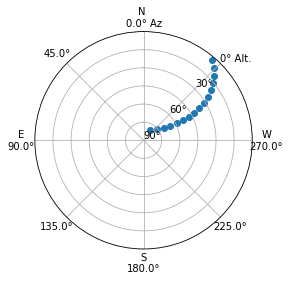

In [150]:
start_time = dec_astro_set
end_time = dec_astro_rise

dec_observing_range = [dec_astro_set, dec_astro_rise]

time_grid = time_grid_from_range(dec_observing_range)

plot_sky(m31, apo, time_grid);

In [151]:
constraints = MoonSeparationConstraint(50*u.deg)
constraints

In [152]:
targets = [m31, spiro]
observing_table = observability_table(constraints, apo, targets, time_range=dec_observing_range)
print('The moon will be {0:.2f} illuminated on DEC 31, 2018 Midnight.'.format(moon_illumination(dec_reference_time)))
print(observing_table)

The moon will be 0.24 illuminated on DEC 31, 2018 Midnight.
target name ever observable always observable fraction of time observable
----------- --------------- ----------------- ---------------------------
        m31            True              True                         1.0
     IC 418            True              True                         1.0


### The Moon
The moon will be .236 illuminated on midnight December 31, 2018. 

A Waning Cresent.

M31 will be observable for 11.04 hours on December 31, 2018, it will not be messed with by the moon. 

### Again
For CTIO and the Spirograph Nebula(IC 418)

In [153]:
ctio = Observer.at_site('ctio')
ctio

<Observer: name='ctio',
    location (lon, lat, el)=(-70.815 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<UTC>>

In [154]:
spiro

<FixedTarget "IC 418" at SkyCoord (ICRS): (ra, dec) in deg (81.86746, -12.697282)>

In [155]:
ctio.timezone = pytz.timezone('US/Pacific')
ctio

<Observer: name='ctio',
    location (lon, lat, el)=(-70.815 deg, -30.165277777777778 deg, 2214.9999999993697 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>

In [156]:
astro_set = ctio.twilight_evening_astronomical(reference_time, which='previous')
astro_rise = ctio.twilight_morning_astronomical(reference_time, which='previous')

In [157]:
observing_length = (astro_rise - astro_set).to(u.h)
observing_length

<Quantity 9.53875353 h>

/Users/jamespierce/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


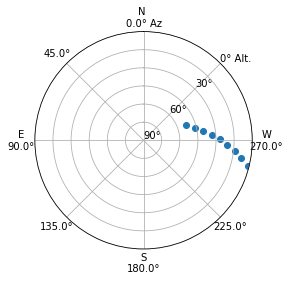

In [158]:
start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]

time_grid = time_grid_from_range(observing_range)

plot_sky(spiro, ctio, time_grid);

/Users/jamespierce/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The frac parameter was deprecated in version 2.1. Use tick padding via Axes.tick_params instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


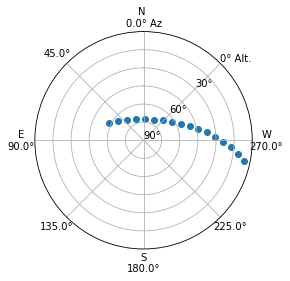

In [159]:
start_time = dec_astro_set
end_time = dec_astro_rise

dec_observing_range = [dec_astro_set, dec_astro_rise]

time_grid = time_grid_from_range(dec_observing_range)

plot_sky(spiro, ctio, time_grid);

In [160]:
observing_table = observability_table(constraints, ctio, targets, time_range=dec_observing_range)
observing_table

target name,ever observable,always observable,fraction of time observable
str6,bool,bool,float64
m31,True,True,1.0
IC 418,True,True,1.0


In [161]:
dec_window_start = Time("2018-12-31 12:00:00")
dec_window_end = Time("2019-01-01 12:00:00")
dec_reference_time = Time("2018-12-31 23:59:59")
dec_reference_time

<Time object: scale='utc' format='iso' value=2018-12-31 23:59:59.000>

In [162]:
dec_astro_set = ctio.twilight_evening_astronomical(dec_reference_time, which='nearest')
dec_astro_rise = ctio.twilight_morning_astronomical(dec_reference_time, which='next')
dec_astro_set

<Time object: scale='utc' format='jd' value=2458484.5585599267>

In [163]:
dec_observing_length = (dec_astro_rise - dec_astro_set).to(u.h)
dec_observing_length

<Quantity 6.74251273 h>

# Best Season
The best season to view Spiro at CTIO is Fall in their location. 
it is observable for 9.54 Hours on march 31, 
The moon will not interfer on December 31 and the Sprio Galaxy will observable for 6.74 Hours. 